<a href="https://colab.research.google.com/github/yagomsv/aulas_ciencia_de_dados_UFBA/blob/main/Aula_4_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Logística

A Regressão Logística serve para classificar algo dentro de um conjunto de categorias. Como exemplo, utilizaremos um conjunto de dados de pacientes com doenças cardiovasculares. Precisamos classificar o paciente como possuindo ou não uma doença cardíaca. A Regressão Linear não é adequada aqui, uma vez que trabalha com valores contínuos.

A Regressão Logística e modelos  é ideal nesse tipo de situação, de classificação, pois trabalha com probabilidades. No caso, após treinar o modelo conseguiríamos ver qual a probabilidade de um dado paciente possuir ou não algum problema no coração.

Pense na imagem acima como se o eixo-x fosse a idade de um paciente e o eixo y a probabilidade dele ter uma doença cardíaca. 

Como você vê, precisamos mapear valores para dentro de um range $[0,1]$. Para isso, usamos a função sigmóide,

$$
sigmoid(z) = \frac{1}{1 + e^{-z}}
$$

onde $z= b + w_1x_1 + w_2x_2 + \dots + w_mx_m$ é o *output* da camada linear de um modelo de regressão logística. A curva **sigmoidal** irá mapear esse valor (qualquer) para o itnervalo entre 0 e 1.

Assim como na Regressão Linear nós tínhamos o erro quadrático (*squared loss*), a *loss function* para a Regressão Logística é representada po

$$
\text{Log Loss} = \sum_{(x, y) \in D} -y\log(\hat{y}) - (1 -y)\log(1-\hat{y})
$$

## Regressão Logística no `scikit-learn`

O conjunto de dados original, que foi adapatado neste *notebook*, foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease).

Diferentemente do arquivo `csv` que foi disponibilizado no Módulo 3, [neste link](http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=0) você encontra o arquivo com os dados já tratado. Para nossa variável alvo (*target*) você encontra as seguintes categorias:

* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1: há doença cardíaca ( > 50% de estreitamento do diâmetro)



In [1]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configurar o notebook
#sns.set_style()

# importar o arquivo
df = pd.read_csv("http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=1")

# ver as primeiras entradas
print("Tamanho do DataFrame: {}\n".format(df.shape))

df.head()

Tamanho do DataFrame: (303, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [2]:
df['num'].value_counts()

0    164
1    139
Name: num, dtype: int64

Repare em tudo que estamos importando na célula abaixo. Além de `LogisticRegression` estamos importando métricas totalmente diferentes daquelas que usamos para avaliar modelos de Regressão Linear, o que faz todo sentido.


In [3]:
# importar scikit-learn para criar o modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Nesta etapa, vamos dividir o *dataset* entre treino e teste, da mesma maneira que fizemos e sempre vamos fazer para outros modelos.

In [4]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LogisticRegression

# 2. Instanciar e escolher os hyperparameters
model = LogisticRegression()

# 3. Separar os dados entre feature matrix e target vector 
X = df.drop('num', axis=1)
y = df['num']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# 3.2 Padronizar os dados de treino
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
X_test = scaler.transform(X_test)  # padronizar os dados de teste
y_pred = model.predict(X_test)

Antes de olhar as métricas de avaliação do modelo, vamos relembrar os conceitos:

* **Verdadeiro positivo (*true positive* — TP):** Por exemplo, quando o paciente tem doença cardiovascular e o modelo classifica como tendo doença vascular.

* **Falso positivo (*false positive* — FP):** Por exemplo, quando o paciente não tem doença cardiovascular e o modelo classifica como tendo doença vascular.

* **Falso negativo (*false negative* — TN)**: Por exemplo, quando o paciente tem doença cardiovascular e o modelo classifica como não tendo doença vascular.

* **Verdadeiro negativo (*true negative* — FN):** Por exemplo, quando o paciente não tem doença cardiovascular e o modelo classifica como não tendo doença vascular.

In [5]:
# imprimir relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Mais sobre matriz de confusão [Aqui](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/#:~:text=F1%20score%20%2D%20F1%20Score%20is,have%20an%20uneven%20class%20distribution.) <p>

**Precision** --> pode ser usada em uma situação em que os Falsos Positivos são considerados mais prejudiciais que os Falsos Negativos. Por exemplo, ao classificar uma ação como um bom investimento, é necessário que o modelo esteja correto, mesmo que acabe classificando bons investimentos como maus investimentos no processo. <p>

**Recall** --> pode ser usada em uma situação em que os Falsos Negativos são considerados mais prejudiciais que os Falsos Positivos. Por exemplo, o modelo deve de qualquer maneira encontrar todos os pacientes doentes, mesmo que classifique alguns saudáveis como doentes no processo.

**F1 score** --> é simplesmente uma maneira de observar somente 1 métrica ao invés de duas (precisão e recall) em alguma situação. É uma média harmônica entre as duas, que está muito mais próxima dos menores valores do que uma média aritmética simples.

Por fim, vamos plotar a matriz de confusão para ter, pictorialmente, uma visão do desempenho por classes.

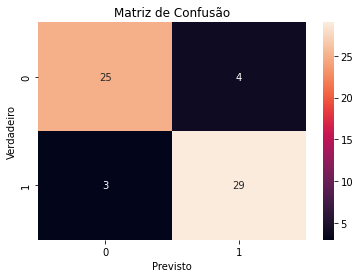

In [6]:
#gráfico da matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

In [7]:
#Salvando a acurácia do modelo para comparar no final
from sklearn.metrics import accuracy_score

Acuracia = pd.DataFrame(columns=["type", "accuracy"])

score1_1 = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", score1_1)
Acuracia = Acuracia.append({"type": "Logistic Regression", "accuracy": score1_1}, ignore_index=True)

Acurácia do modelo: 0.8852459016393442


Caso você queira ver as probabilidades associadas a cada previsão, pode utilizar o método `predict_proba` da seguinte maneira.

In [8]:
# probabilidades em cima do dataset de teste
y_prob = model.predict_proba(X_test)

print("y_pred: \n", y_pred[0:5])
print("\ny_proba: \n", y_prob[0:5])

y_pred: 
 [1 1 1 1 1]

y_proba: 
 [[0.27702241 0.72297759]
 [0.18827775 0.81172225]
 [0.22774853 0.77225147]
 [0.48942582 0.51057418]
 [0.37284695 0.62715305]]


## Análise discrimitante linear 

É um método utilizado para classificação, redução de dimensão e visualização de dados.

Essa técnica compara as diferenças (separação) entre os
grupos e classifica o novo objeto como pertencente ao grupo
com perfil mais semelhante.

In [9]:
#importando bibliotecas
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score

In [10]:
#Criando o modelo e fazendo a predição
lda = LinearDiscriminantAnalysis()
model1 = lda.fit(X_train, y_train)

print(model1.priors_)

[0.55785124 0.44214876]


In [11]:
#Analisando as médias do modelo para cada classificação 0 e 1
print(model1.means_)

[[-0.22958858 -0.24496155 -0.33958975 -0.14799444 -0.12083581 -0.00883022
  -0.15534709  0.32656472 -0.37159079 -0.37928938 -0.29180481 -0.4261
  -0.43059821]
 [ 0.28966784  0.30906363  0.42845435  0.18672196  0.1524564   0.01114093
   0.19599866 -0.41202091  0.4688295   0.47854267  0.36816495  0.5376028
   0.54327812]]


In [12]:
#Analisando os coeficientes do modelo
print(model1.coef_)

[[ 0.0459499   0.7091234   0.65974234  0.25300314  0.34815717 -0.22087288
   0.14973453 -0.31711759  0.52167876  0.37772506  0.42384431  1.15874775
   0.77250134]]


In [13]:
#Fazendo o teste do modelo
pred=model1.predict(X_test)
print(np.unique(pred, return_counts=True))

(array([0, 1]), array([28, 33]))


In [14]:
#Analisando a matriz de confusão
print(confusion_matrix(pred, y_test))
print(classification_report(y_test, pred, digits=3))

[[25  3]
 [ 4 29]]
              precision    recall  f1-score   support

           0      0.893     0.862     0.877        29
           1      0.879     0.906     0.892        32

    accuracy                          0.885        61
   macro avg      0.886     0.884     0.885        61
weighted avg      0.885     0.885     0.885        61



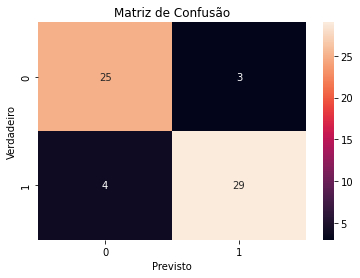

In [15]:
#Gráfico da matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(pred, y_test), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

In [16]:
#Salvando a acurácia do modelo para comparar no final
score1_2 = accuracy_score(y_test, pred)
print("Acurácia do modelo:", score1_2)
Acuracia = Acuracia.append({"type": "Linear", "accuracy": score1_2}, ignore_index=True)

Acurácia do modelo: 0.8852459016393442


### Análise discriminante quadrática

In [17]:
#Criando o novo modelo e analizando as informações úteis
qda = QuadraticDiscriminantAnalysis()
model2 = qda.fit(X_train, y_train)
print(model2.priors_)
print(model2.means_)

[0.55785124 0.44214876]
[[-0.22958858 -0.24496155 -0.33958975 -0.14799444 -0.12083581 -0.00883022
  -0.15534709  0.32656472 -0.37159079 -0.37928938 -0.29180481 -0.4261
  -0.43059821]
 [ 0.28966784  0.30906363  0.42845435  0.18672196  0.1524564   0.01114093
   0.19599866 -0.41202091  0.4688295   0.47854267  0.36816495  0.5376028
   0.54327812]]


In [18]:
#Fazendo o teste do modelo e analisando a matriz de confusão
pred2=model2.predict(X_test)
print(np.unique(pred2, return_counts=True))
print(confusion_matrix(pred2, y_test))
print(classification_report(y_test, pred2, digits=3))

(array([0, 1]), array([31, 30]))
[[26  5]
 [ 3 27]]
              precision    recall  f1-score   support

           0      0.839     0.897     0.867        29
           1      0.900     0.844     0.871        32

    accuracy                          0.869        61
   macro avg      0.869     0.870     0.869        61
weighted avg      0.871     0.869     0.869        61



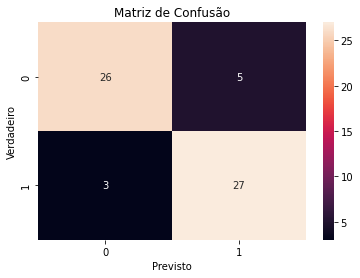

In [19]:
#Gráfico da matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(pred2, y_test), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

In [20]:
#Salvando a acurácia do modelo para comparar no final
score1_3 = accuracy_score(y_test, pred2)
print("Acurácia do modelo:", score1_3)
Acuracia = Acuracia.append({"type": "Quadratic", "accuracy": score1_3}, ignore_index=True)

Acurácia do modelo: 0.8688524590163934


### K-Nearest Neighbors (KNN)

1- calcula a distância entre uma nova amostra e as demais amostras do dataset (imagine algo como a distância entre dois pontos no plano cartesiano, mas logo a seguir comento sobre isso); 

2- identifica as K amostras mais próximas ou com características mais similares (depois que você tem o valor da distância, é só escolher as K distâncias com os menores valores); 

3- a partir das K amostras mais próximas, verificamos qual o rótulo que mais aparece e esse rótulo será usado na nova amostra.

**K** --> é a quantidade de vizinhos que consideramos para cada amostra

In [21]:
#Criando um novo modelo KNN com K = 1
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors = 1)

#Fazendo o teste do modelo
pred3 = knn.fit(X_train, y_train).predict(X_test)

In [22]:
#Analisando a matriz de confusão
print(confusion_matrix(y_test, pred3).T)
print(classification_report(y_test, pred3, digits=3))

[[27  5]
 [ 2 27]]
              precision    recall  f1-score   support

           0      0.844     0.931     0.885        29
           1      0.931     0.844     0.885        32

    accuracy                          0.885        61
   macro avg      0.887     0.887     0.885        61
weighted avg      0.890     0.885     0.885        61



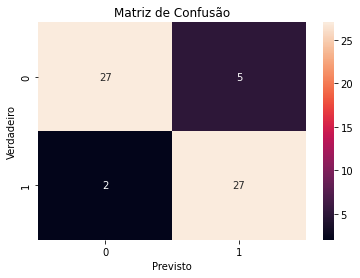

In [23]:
#Gráfico da matriz
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, pred3).T, annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

In [24]:
#Salvando a acurácia do modelo para comparar no final
score1_4 = accuracy_score(y_test, pred3)
print("Acurácia do modelo:", score1_4)
Acuracia = Acuracia.append({"type": "KNN - 1", "accuracy": score1_4}, ignore_index=True)

Acurácia do modelo: 0.8852459016393442


### KNN com K = 2

In [25]:
#Um novo modelo com K = 3
knn1 = neighbors.KNeighborsClassifier(n_neighbors=2)

#Fazendo o teste do modelo
pred4 = knn1.fit(X_train, y_train).predict(X_test)

print(confusion_matrix(y_test, pred4).T)
print(classification_report(y_test, pred4, digits=3))

[[28 11]
 [ 1 21]]
              precision    recall  f1-score   support

           0      0.718     0.966     0.824        29
           1      0.955     0.656     0.778        32

    accuracy                          0.803        61
   macro avg      0.836     0.811     0.801        61
weighted avg      0.842     0.803     0.800        61



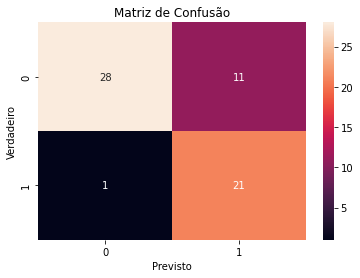

In [26]:
#Gráfico da matriz
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, pred4).T, annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

In [27]:
#Salvando a acurácia do modelo para comparar no final
score1_5 = accuracy_score(y_test, pred4)
print("Acurácia do modelo:", score1_5)
Acuracia = Acuracia.append({"type": "KNN - 2", "accuracy": score1_5}, ignore_index=True)

Acurácia do modelo: 0.8032786885245902


### KNN com K = 3

In [28]:
#Um novo modelo com K = 3
knn1 = neighbors.KNeighborsClassifier(n_neighbors=3)

#Fazendo o teste do modelo
pred4 = knn1.fit(X_train, y_train).predict(X_test)

print(confusion_matrix(y_test, pred4).T)
print(classification_report(y_test, pred4, digits=3))

[[28  3]
 [ 1 29]]
              precision    recall  f1-score   support

           0      0.903     0.966     0.933        29
           1      0.967     0.906     0.935        32

    accuracy                          0.934        61
   macro avg      0.935     0.936     0.934        61
weighted avg      0.937     0.934     0.934        61



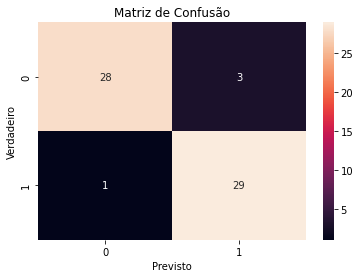

In [29]:
#Gráfico da matriz
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, pred4).T, annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

In [30]:
#Salvando a acurácia do modelo para comparar no final
score1_5 = accuracy_score(y_test, pred4)
print("Acurácia do modelo:", score1_5)
Acuracia = Acuracia.append({"type": "KNN - 3", "accuracy": score1_5}, ignore_index=True)

Acurácia do modelo: 0.9344262295081968


### KNN com K = 4

In [31]:
#Um novo modelo com K = 3
knn1 = neighbors.KNeighborsClassifier(n_neighbors=4)

#Fazendo o teste do modelo
pred5 = knn1.fit(X_train, y_train).predict(X_test)

print(confusion_matrix(y_test, pred5).T)
print(classification_report(y_test, pred5, digits=3))

[[28  5]
 [ 1 27]]
              precision    recall  f1-score   support

           0      0.848     0.966     0.903        29
           1      0.964     0.844     0.900        32

    accuracy                          0.902        61
   macro avg      0.906     0.905     0.902        61
weighted avg      0.909     0.902     0.902        61



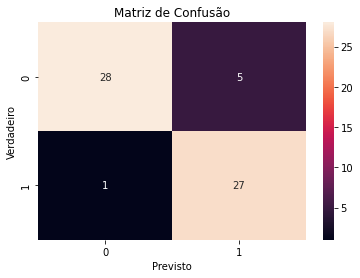

In [32]:
#Gráfico da matriz
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, pred5).T, annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

In [33]:
#Salvando a acurácia do modelo para comparar no final
score1_5 = accuracy_score(y_test, pred5)
print("Acurácia do modelo:", score1_5)
Acuracia = Acuracia.append({"type": "KNN - 4", "accuracy": score1_5}, ignore_index=True)

Acurácia do modelo: 0.9016393442622951


## Analisando a acurácia de cada modelo

In [34]:
Acuracia

,type,accuracy
0,Logistic Regression,0.885246
1,Linear,0.885246
2,Quadratic,0.868852
3,KNN - 1,0.885246
4,KNN - 2,0.803279
5,KNN - 3,0.934426
6,KNN - 4,0.901639
